<p align="center">
<img src="https://github.com/datacamp/python-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

# **Time Series Analysis in Python**


Welcome to this hands-on training where we will learn to extract meaningful insights and make predictions based on time series data. 

In this session, you will learn to:

- Identify trends and seasonality in data
- Use correlation analysis to uncover patterns in time series
- Use models like the moving average model and the autoregressive model to make predictions


# **The datasets**

Time series data is exceptionally varied, as are time series analysis techniques, and it's important to know more than just one technique, so we'll be using several datasets throughout the training. We will be working with these two datasets:

- Monthly US gasoline production, in millions of barrels)
- Quarterly unemployment rate in the US

Each dataset will only have two columns:
- `date`: the end date of the period (month or quarter)
- `value`: the value of the quantity


# **Getting started**

In [0]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

# Set plot style
plt.style.use('seaborn')

# Set plot size
plt.rcParams['figure.figsize'] = [8,6]

# **Preparing the data**

For the first part of the training, we'll be using the data containing weekly US gasoline production from `1991-02-03` to `2017-01-15`, in millions of barrels.

##      **Loading the data**

In [0]:
# Load the data from a CSV file
data = pd.read_csv("https://raw.githubusercontent.com/datacamp/time-series-analysis-in-python-live-training/master/data/US_gasoline_production.csv")

# Print the DataFrame info


# Print the DataFrame


## **Creating a datetime index**

The data contains dates in the `date` column, but the column is of type `object`, and it isn't the index of the DataFrame! 

Solutions: 

- Use arguments `parse_dates=[list_of_column_name]` and `index_col="ColumnName"` in `pd.read_csv()`

- Use `pd.to_datetime()` and `.set_index()` after loading the DataFrame 

We'll use the second one.

`pd.to_datetime()` accepts a value or a collection of values and converts them to a `datetime` object.

`data.set_index()` accepts the name of the column that should become the index, and retuns a _new_ DataFrame. 
Specify `inplace=True` to avoid creating a copy.

In [0]:
# Convert the date column to datetime


# Set the index of the DataFrame to the date column


# Print DataFrame summary


# Print DataFrame


# **Exploratory analysis**


## **Plotting a time series**

... is the easiest kind of plotting in Python: just use `df.colum_name.plot()` !

In [0]:
# Plot the series


Notice the style of the plot: it looks different from the default `matplotlib` style. The style was set in the very first cell using `plt.style.use('seaborn')`

The plot looks very noisy. Do we really need _weekly_ data?

## **Resampling**


Resampling means changing the frequency of data:
- **Upsampling** : from lower to higher frequency (daily &rarr; hourly).

- **Downsampling** : from higher to lower frequency (daily &rarr; weekly). 

<br> 

<a href="https://learn.datacamp.com/courses/manipulating-time-series-data-in-python"><img src = "https://assets.datacamp.com/production/course_4205/shields/original/shield_image_course_4205_20200406-1-f1geys" width="20%"></a>   

Lower-frequency data is usually aggregated: value for week X is the sum/average/max/min/... of all the daily values in week X.

##### Steps of downsampling:

1. `.resample(rule='M'|'W'|'D'|..)`...

2. aggregate `.mean()`, `.sum()`

In [0]:
# Resample the data to the average monthly values


# Print the head of data


# Print the head of resampled data


The resampled DataFrame contains the last day of the month for every month, and the corresponding value is the average of values within that month.

In [0]:
# Plot resampled data


Looks like some sort of pattern and also a trend, but both are hard to see. 

Restrict the data to a time range to "zoom in" on the plot:

In [0]:
# Plot the data from 2000 to 2003


The same pattern seems to be repeated every year: January has the lowest value, July &mdash; the highest, and there's an additional dip in September.

## **Smoothing: rolling windows**

Even after resampling, the trends and patterns might be hard to see. 

> **Rolling aggregation** creates a _new_ time series: the value for each timestamp is an aggregation of a fixed number of previous values.


<font color = AAAAAA><i>
- Value for today = Average of values since last Tuesday
- Value for yesterday = Average of values since last Monday
- Value for Sunday = Average of values since Sunday before that
- ...
</i></font>
$U_t = \frac{1}{7}(Y_t + Y_{t-1} + Y_{t-2} + Y_{t-3} + Y_{t-4} + Y_{t-5}+ Y_{t-6})$


|date|original series|rolling window series|
|---|---|---|
|2020-05-01| 5 |NaN|
|2020-05-02| 7 |NaN|
|2020-05-03| 9 |NaN|
|2020-05-04| 11|NaN|
|2020-05-05| 13|NaN|
|2020-05-06| 15|NaN|
|2020-05-07| 17| (NaN|
|2020-05-08| 2 | (5 + 7 + 9 + 11 + 13 + 15 + 17)/7|
|2020-05-09| 4 | (7 + 9 + 11 + 13 + 15 + 17 +2)/7|
|2020-05-10| 6 | (9 + 11 + 13 + 15 + 17 +2 +4)/7|
|2020-05-11| 8 | (11 + 13 + 15 + 17 +2 +4 +6)/7|
|2020-05-12| 10 | (13 + 15 + 17 +2 +4 +6 + 8)/7|
|2020-05-13| 12 |(15 + 17 +2 +4 +6 + 8 +10)/7|
|2020-05-14| 14 |(17 +2 +4 +6 + 8 +10 + 12)/7|

<br>

<font size = 5> larger window = less detail = more smooth</font>


##### **Steps of rolling window smoothing:**

1. `.rolling(n_periods)`...

2. aggregate `.mean()`, `.sum()`



In [0]:
# Plot the resampled data with a 6 months rolling average


# Plot the resampled data with a 12 months rolling average



Looks like there was a general increasing trend until 2007-2008, when the value started decreasing. [What happened in 2008?..](https://en.wikipedia.org/wiki/Great_Recession)

---
<img src="attachment:image.png">

<font color="00AAFF" size = 5>Homework</font>

<font color=00AAFF>_Think you are a `pandas` wizard? Try using a rolling window + weighted average on a column where the weights come from another column_ 😉</font>

<font color=00AAFF>_For example:_ 

|date|series|weights|3 day rolling window|
|---|---|---|---|
|2020-05-01| 5 |0.3| NaN|
|2020-05-02| 7 |0.2| NaN|
|2020-05-03| 9 |0.15| NaN|
|2020-05-04| 11|0.08| (5 * 0.3) + (7 * 0.2) + (9 * 0.15)|
|2020-05-05| 13|0.2| (7 * 0.2) + (9 * 0.15) + (11 * 0.08)|
|2020-05-06| 15|-0.3| (9 * 0.15) + (11 * 0.08) + (13 * 0.2)|
|...|...|...|...

</font>

---

## **Time series = Trend + Seasonality + Residuals**

    
- **Trend**: general direction of the series (e.g. increasing)
- **Seasonality**: repeating patterns in data (e.g. sales around holidays..)
- **Residuals**: the rest

`statsmodels.tsa.seasonal.seasonal_decompose()` takes a DataFrame and returns an object with attributes:
- `.trend`
- `.seasonal`
- `.resid`
each containing the time series that encodes the corresponding part of the original series, 

and a method
- `.plot()`
which makes 4 plots:  original series + 3 its components

In [0]:
# import seasonal_decompose


# Plot decomposed series


_Note: plotting functions in `statsmodels` both draw and return the figure, so plotting them from the last line of a cell will result in duplicate plots. Use a semicolon_ `;` _after the plot to prevent that._

## **Don't just trust your eyes**

A series that exhibits a clear visible trend or seasonality probably really does have those features. Just because you cannot detect trends or seasonality, doesn't mean they aren't there!

<img src="https://github.com/datacamp/time-series-analysis-in-python-live-training/raw/master/assets/sine.png">

This data lies on a perturbed sine curve. Can you tell?

_Autocorrelation_ will help us identify hidden patterns in series

---
<center><h1> Q&A 1</h1> </center>

---


# **Autocorrelation**

For prediction, we need to know how future values of time series depend on the past values.

Correlation of two _random variables_ is a measure of dependency of one variable on the other. For time series, *auto*correlation, as the name might suggest, will measure self-correlation &mdash; the dependency of time series on itself.


## **Lags**

Lagged time series is just the same time series shifted by a certain number of days/weeks/month, called the _lag_, into the past:
<!--
|date|original series|lag-2 series|
|---|---|---|
|2020-05-01| 5 |NaN|
|2020-05-02| 7 |NaN|
|2020-05-03| 9 |5|
|2020-05-04| 11|7|
|2020-05-06| 13|9|
|2020-05-07| 15|11|
|2020-05-08| 17| 13|
|2020-05-08| 2 | 15|
|2020-05-10| 4 | 17|
|2020-05-11| 6 | 2|
|2020-05-12| 8 | 4|
|2020-05-13| 10 | 6|
|2020-05-14| 12 |8|
|2020-05-15| 14 |10|
-->
<img src = "https://github.com/datacamp/time-series-analysis-in-python-live-training/raw/master/assets/lag-1.png" height=400pt> 
<img src = "https://github.com/datacamp/time-series-analysis-in-python-live-training/raw/master/assets/lag-2.png" height=400pt>

Notice the `NaN`s! The bigger the lag is, the shorter the lagged series will be.

## **Autocorrelation function**
Function of the lag $\mathbf{n}$. 

$$\large{Autocorr(\mathbf{n}) = corr(series, \,lag\,\mathbf{n}\, series)}$$

Measures how much the value of the series now depends on the value $\mathbf{n}$ days ago.


`statsmodels` offers two functions related to autocorrelation:
- `statsmodels.tsa.stattools.acf()`  will compute the ACF for a time series passed to it, with 40 lags range by default
- `statsmodels.graphics.tsaplots.plot_acf()` will just plot the ACF -- which is usually what we want


In [0]:
# Import plot_acf


# Plot ACF of data_monthly



The lags are on the $x$ axis. Note that lag-0 correlation is always 1.

The filled band around the $x$ axis is the _confidence interval_: if the autocorrelation value is outside that range, the dependency is likely "real", but if it's inside &mdash; it's likely due to randomness.

## **A word of warning: misinterpreting autocorrelation**

The autocorrelation seems to be very strong: does that mean there's a very strong dependency between past and present values that we can use for modeling? Let's take a look at the data again:

In [0]:
# Plot data_monthly again


The series shows a strong trend, and that's what the autocorrelation plot reflects: if the series was going up last e.g. 6 months, it will probaby continue going up for the next month or two.

_Autocorrelation in series with trends reflects the trend rather than intrinsic dependencies in data._

For autocorrelation analysis to be meaningful, the time series should be _stationary_.

# **Stationarity**

Most time series models assume that the time series is _stationary_. In plain language, that means that the features of the series do not depend on the _time_ when they occur (but they might depend on the past _values_). This means, among other things:

- Constant mean
- Contant variance

**Time series that exhibit trend and seasonality are not stationary.**

Most time series models assume stationarity of the series they model, so you often need to remove trend and seasonality from the series, build the model, then put it back.


## **Detrending**

There are a few ways to get rid of the trend

- _Fit the trend curve first_

For example, for a linear trend, use linear modeling techniques to find the fit, then subtract it from the series. To learn more, check out this course:

<a href = https://learn.datacamp.com/courses/introduction-to-linear-modeling-in-python><img src ="https://assets.datacamp.com/production/course_5828/shields/original/shield_image_course_5828_20191101-1-6dynnz?1572614527" height=200pt></a>

- _Differencing_

Instead of looking at the actual values of the series look at the _differences_ in values:

$U_t = Y_{t} - Y_{t-1}$

Here's an example:

<br>

|date|original series|differenced series|
|---|---|---|
|2020-05-01| 5 |NaN|
|2020-05-02| 7 |7-5 = **2**|
|2020-05-03| 8 |8-7 = **1**|
|2020-05-04| 8|8-8 = **0**|
|2020-05-06| 9|9 - 8 = **1**|

<br>

The original series is growing, but the differences aren't. 


`pandas` method `.diff()` can be used to difference the series.

- _Other transformations_

Returns and log-returns, $\log{\frac{Y_t - Y_{t-1}}{Y_t}}$, are also commonly used in modeling stock prices. 

---
Let's use differencing to detrend the gasoline production series.

In [0]:
# Difference data_monthly


# Show differenced values


In [0]:
# Plot differenced data


In [0]:
# Plot ACF for differenced data


## **Dealing with seasonality**

Dealing with seasonality is much more complicated. Many organizations (e.g. US Census Bureau) have developed their own methods for removing seasonality from data.

Some things you can do yourself:

- _Model within one period_

If you're only using data from 14 days in June, does it matter if there's a yearly seasonal spike around winter holidays?..

- _Use seasonally-adjusted data_

For example, most US government agencies provide seasonally-adjusted data by default.

- _Do seasonal adjustment yourself_

  - Use higher-order differencing
  - Use the residuals from `seasonal_decompose()`, contained in the `.resid` attribute
  - Special techniques like [STL](https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.STL.html)

- _Use special models like Seasonal ARIMA (SARIMA)_

<a href = "https://learn.datacamp.com/courses/arima-models-in-python"><img src = "https://assets.datacamp.com/production/course_17329/shields/original/shield_image_course_17329_20200204-1-j51xkd?1580822917" height=200pt></a>


In [0]:
# Plot seasonal decomposition of data_monthly again


# Extract residuals and save


# Print the head and tail of the residual component



The residual component of seasonal_decompose will have the first few and last few values missing because statmodels uses rolling average to identify trends and residuals.

In [0]:
# Drop NaN values from residuals


# Plot ACF of the residual component of data_monthly



---
<font color="00AAFF" size = 5>**Homework**</font>


1. <font color=00AAFF>Use `df.shift()` and `df.corr()` to implement the autocorrelation function yourself.</font>


2. <font color=00AAFF>It's pretty easy to tell when a series is non-stationary if it has trend or seasonality. It's harder to claim that a series that _appears_ stationary truly _is_ stationary. Learn about the [Dickey-Fuller test](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) for stationarity and [`statsmodels.tsa.stattools.adfuller()`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)</font>

---

---
<center><h1> Q&A 2</h1></center>

---

# **Time series models**

This section is going to have some math formulas in it, but don't worry: the intuitions are pretty simple! If you don't understand formulas fully, that shouldn't stop you from modeling!


## **Two basic models**

#### **1. White noise**

> The best model for a future value is just a constant mean

$$\large{value\_today = mean + noise\_today}$$
<br>
$$Y_t = \mu + \varepsilon_t$$



This time series just oscillates around the mean: 

<img src = "https://github.com/datacamp/time-series-analysis-in-python-live-training/raw/master/assets/white_noise.png" >


#### **2. Random walk**

> The best model for a future value is the previous value

$$\large{value\_today = value\_yesterday + noise\_today}$$
<br>
$$Y_t = Y_{t-1} + \varepsilon_t$$


This time series drifts randomly:

<img src = "https://github.com/datacamp/time-series-analysis-in-python-live-training/raw/master/assets/random_walk.png">


## **Moving average (MA) model**

Shocks/noise/errors from a few days ago can still impact the series today: for example a particularly big market shock can persist for days.  We can improve the white noise model slighly by taking into account the previous errors.

<br>

$$MA(q): \large{value\_today = mean + avg(past \, \mathrm{q} \,noises)}$$

$$Y_t = \mu + \varepsilon_t + \phi_1 \varepsilon_{t-1} + \phi_2 \varepsilon_{t-2} +...+ \phi_q \varepsilon_{t-q} $$

<br>

"Average" means "weighted average", with weights $\phi_i$ possibly diminishing as we go farther in the future.

### **Detecting MA model order**

$MA(q)$ only contains information about the past $q$ time periods, so there should be no significant autocorrelation after $q$ lags.

Consequently, $MA(q)$ models are suitable for modeling time series with ACF that "stops" at a certain point.

For example, this is generated from a true $MA(2)$ process:

<img src = "https://github.com/datacamp/time-series-analysis-in-python-live-training/raw/master/assets/ma.png">

In [0]:
# Plot ACF of residuals again 


While the pattern is not as clear as on the idealized example, we could say that after lag 5, autocorrelation is basically non-existent.

So we'll fit an $MA(5)$ model.

### **Fitting MA(q) model**

`statsmodels.tsa.arima_model.ARMA` is a class representing a general ARMA model 
(ARMA = AR + MA, where AR is "autoregressive". We'll get to it in a sec!)

1. **Create the model**

`statsmodels.tsa.arima_model.ARMA(series_here, order=(p,q))` will create the model object.

To specify an $MA(q)$ model, pass `order = (0,q)`


2. **Fit the model**

`model.fit()` will fit the model and return the results object.


In [0]:
# Import ARMA


# Fit the model to data_monthly_diff


Use `result.summary()` to view information about the model fit: 

In [0]:
# Print summary of the model


### **Predicting with MA(q) model**

- `result.predict(start=..., end=...)`

Will return predictions from the `start` date to the `end` date. Can give in-sample and out-sample predictions.

For in in-sample dates, one-step-ahead prediction will be made by default, i.e. in-sample  values are used for prediction instead of previous forecasts. 


- `result.plot_predict(start=..., end=...)`

Will plot predictions from the `start` date to the `end` date. For out-of-sample predictions, a confidence interval will be shown as well.

In [0]:
# Plot predictions from "2013-01-31" to "2017-01-31"


It isn't a great forecast, but it also isn't bad, especially for such a simple model: it accurately predicts the direction of the change, but it underestimates the magnitude.

---
<center><h1>Q&A 3</h1></center>

---


# **New dataset**

In this section, we'll work with the `US unemployment` dataset from the US Census Bureau, containing quarterly data on the % of people unemployed in the US. The data has been _seasonally adjusted_ already.

Let quickly plot it and de-trend it using differencing.



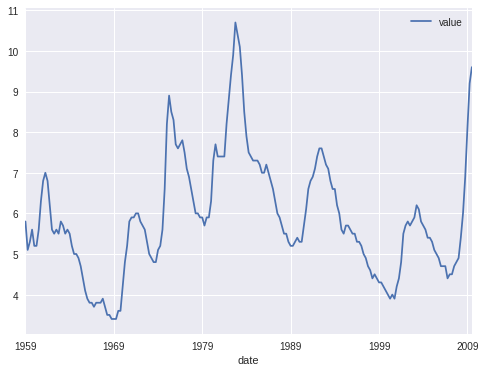

In [0]:
# Load the unemployment data and set index
unemployment = pd.read_csv("https://raw.githubusercontent.com/datacamp/time-series-analysis-in-python-live-training/master/data/US_unemployment.csv")
unemployment["date"] = pd.to_datetime(unemployment["date"])
unemployment.set_index("date", inplace=True)

# Plot the data
unemployment.plot()

In [0]:
# Difference the data


# Plot the differenced data



## **Autoregressive model**

Model future value not just by a single past value, but by several past values (instead of past _residuals_, like in $MA(q)$ model:

<br>
$$AR(p): \large{value\_today = mean + avg(past \, \mathrm{p} \, values) + noise\_today}$$

$$Y_t = \mu + \theta_1 Y_{t-1} + \theta_2 Y_{t-2} + \dots + \theta_p Y_{t-p} + \varepsilon_t$$ 
<br>

where average is, again, a weighted average. How far in the past the model goes, i.e. the value of $p$, is the _order_ of the model. The model is usually denoted AR(p).

Low orders are the most common: $AR(1)$, $AR(2)$,.. 


$$ \text{AR(1): }Y_t = \mu + \theta Y_{t-1} + \varepsilon_t $$
<br>

When $\theta = 1$, this is a _random walk_ model. When $\theta \geq 1$, the process is not stationary: the variance increases.



### **Detecting model order**

Unlike in the $MA(q)$ model, in $AR(p)$ models of any order, the current value depends on _all_ the past values:

<br>
$$
\begin{align}
Y_t = \mu + \theta \color{red}{Y_{t-1}} + \varepsilon_t &= \mu + \theta \color{red}{(\mu + \theta {Y_{t-2}} + \varepsilon_{t-1})} + \varepsilon_t\\
\\
\mu + \theta \color{red}{(\mu + \theta \color{blue}{Y_{t-2}} + \varepsilon_{t-1})} + \varepsilon_t &=\mu + \theta \color{red}{(\mu + \theta \color{blue}{(\mu + \theta {Y_{t-3}} + \varepsilon_{t-2})} + \varepsilon_{t-1})} + \varepsilon_t = \\ 
\\
\mu + \theta \color{red}{(\mu + \theta \color{blue}{(\mu + \theta \color{magenta}{{Y_{t-3}}} + \varepsilon_{t-2})} + \varepsilon_{t-1})} + \varepsilon_t &= \dots
\end{align}
$$
<br>

When $|\theta_i| < 1$, the dependency will dimish as we go further and further into the past:

<br>
$$AR(1) : Y_{t} = constant + \theta Y_{t-1} + \theta^2 Y_{t-2} + \theta^3 Y_{t-3}  + \dots $$
<br>

So the autocorrelation function does not "stop" &mdash; it just decreases to 0. 

Here's an example from a true $AR(3)$ process:

<img src = "https://github.com/datacamp/time-series-analysis-in-python-live-training/raw/master/assets/ar.png">



In [0]:
# Plot ACF for unemployment_diff



The value of autocorrelation oscillates between negative and positive, but the magnitude is decreasing

#### **Partial autocorrelation function**

Partial autocorrelation function is a modified autocorrelation function that takes into account dependencies betweed previous lags, and removes extraneous dependencies shown in the correlation function.

- `statsmodels.tsa.stattools.pacf()` will return values of the PACF
- `statsmodels.graphics.tsaplots.plot_pacf()` will show the plot of the PACF

For time series that behave like an $AR(p)$ process, the PACF "stops" at a certain lag. That lag can serve as the model order.

Here's a PACF of a true $AR(2)$ model:

<img  src = "https://github.com/datacamp/time-series-analysis-in-python-live-training/raw/master/assets/pacf.png">

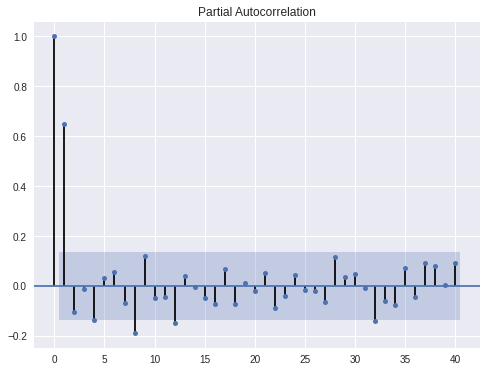

In [0]:
# Import plot_pacf

# Plot pacf for unemployment_diff



Unlike with the ACF plot, there's no gradual decrease after lag 1.

### **Fitting AR(p) model**

`statsmodels.tsa.arima_model.ARMA` is a class representing a general ARMA model 
(ARMA = AR + MA, where AR is "autoregressive", "MA" is "moving average")

1. **Create the model**

`statsmodels.tsa.arima_model.ARMA(series_here, order=(p,q))` will create the model object.

_To specify an $AR(p)$ model, pass `order = (p,0)`_


2. **Fit the model**

`model.fit()` will fit the model and return the results object.


In [0]:
# Import ARMA


# Fit the model to unemployment_diff


# Print the summary


### **Predicting with AR(p) model**

Same as for $MA(q)$ model:

- `results.predict(start=..., end=...)`

Will return predictions from the `start` date to the `end` date. Can give in-sample and out-sample predictions.

For in in-sample dates, one-step-ahead prediction will be made by default, i.e. in-sample  values are used for prediction instead of previous forecasts. 


- `results.plot_prediction(start=..., end=...)`

Will plot predictions from the `start` date to the `end` date. For out-of-sample predictions, a confidence interval will be shown as well.


In [0]:
# Plot predictions from "2006-03-31" to "2011-03-31"

---
<center><h1>Q&A 4</h1><center>

---